# Locally Weighted Linear Regression

## Model Specification

Locally weighted linear regression (LWLR) achieves flexibility in fitting locally linear models at query point $x_0$, via a weighting function or **kernel** $K_{\lambda}(x_0; x_i)$. More specifically, LWLR solves a separate weighted least squares problem at each target point $x_0$:

\begin{align}
\min_{\alpha(x_0), \beta(x_0)}\sum_{i=1}^N K_{\lambda}(x_0, x_i)[y_i-\alpha(x_0)-\beta(x_0)x_i]^2.
\end{align}

The estimate is then $\hat{f}(x_0)=\hat{\alpha}(x_0)+\hat{\beta}(x_0)$. Note that although we fit an entire linear model to the data in the region, we only use it to evaluate the fit at the single point $x_0$. As such, LWLR automatically modifies to adjust the fitting point.

Note that $\hat{f}(x_0)$ above is linear in $y_i$: it can be shown that $\hat{f}(x_0)=\sum_{i=1}^N l_i(x_0)y_i$, where $l_i$ does not depend on $y$. These weights $l_i(x_0)$ combine the weighting kernel $K_{\lambda}(x_0, \cdot)$ and the least square operations, and are sometimes referred to as the **equivalent kernel**. It can be shown that for LWLR, $\sum_{i=1}^Nl_i(x_0)=1$ and $\sum_{i=1}^N(x_i-x_0)l_i(x_0)=0$. In this sense, LWLR automatically modifies the kernel to correct the bias exactly to the first order, a phenomenon dubbed as **automatic kernel carpentry**.

### Variants and Generalizations

If we restrict the model to only fit constant terms, i.e. restrict $\beta(x_0)=0$ in LWLR, the resulting is another kind of weighted average of $y_i$: 
$$\hat{f}(x_0)=\frac{\sum_{i=1}^NK_{\lambda}(x_0, x_i)y_i}{\sum_{i=1}^NK_{\lambda}(x_0, x_i)}.$$ 
This is known as the **Nadaraya-Watson kernel-weighted average**. This average can perform smoother fit to plain-vanilla [kNN](kNN.ipynb), but is also found to be badly biased on the boundaries of the domain, because of the asymmetry of the kernel in that region. This bias can be resolved by LWLR by automatic kernel carpentry mentioned above.

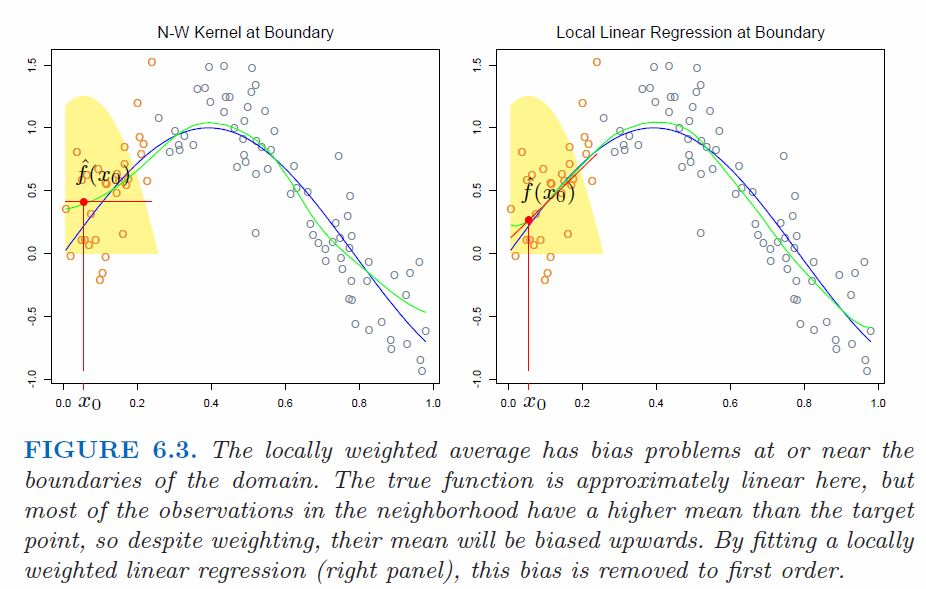

In [1]:
from IPython.display import Image
import os.path
path = r"C:\Users\Yixian\Documents\machine-learning"
file = "NW_vs_LWLR.JPG"
Image(filename = os.path.join(path, file))

To correct for bias on high order, the most straightforward generalization to LWLR is to fit polynomial regression. Some 'collected wisdom' as in ESL:

- Local linear fits can help bias dramatically at the boundaries at a modest cost in variance. Local quadratic fits do little at the boundaries for bias, but increase the variance a lot.

- Local quadratic fits tend to be most helpful in reducing bias due to curvature in the interior of the domain.

- Asymptotic analysis suggest that local polynomials of odd degree dominate those of even degree. This is largely due to the fact that asymptotically the MSE is dominated by boundary effects.

## Theoretical Properties

### Advantages and Disadvantages (might refer to the table in Section 10.7 in ESL)

### Relation to Other Models

- Together with [kNN](kNN.ipynb), LWLR is a kind of non-parametric, or memory-based technique.
- The fact that higher order polynomial fits improves on bias but increase the variance is similar to what happens in [natural_cubic_spline](natural_cubic_spline.ipynb) and [smoothing splines](smoothing_splines.ipynb)

## Empirical Performance

### Advantages and Disadvantages

## Implementation Details and Practical Tricks

## Use Cases

## Results Interpretation, Metrics and Visualization

## References 
### Further Reading

## Misc.